# Checking AuxTel Pointing 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm

from astropy.table import Table, join

In [2]:
%matplotlib inline


In [3]:
from datetime import date
date = date.today().strftime("%d%m%Y")
print(f'Today is: {date}')

Today is: 26102022


## The Dataset

Basically, we query the WCS solution from the bulter calibrate task, the boresight pointing position and some information from the exposure metadata. The sample was queried using the script `query_pointing_bluter_reviewed.py`.

The main quantities of this dataset are:
- `RA`, `DEC` : pointing sky position from the boersight
- `RA_WCS`, `DEC_WCS` : pointing sky position from the wcs solutions
- `PNT_OFFSET`: angular distance between the two pointings.

The other columns are exclusively from the metadata and the end with `_MD`: `RA`, `DEC`,`MJD`,`EXPTIME`,`TEMP_SET`,`CCDTEMP`,`FILTER`,`ELSTART`,`ELEND`,`AZSTART`,`AZEND`

The file `data/rev_checking_auxtel_pointing_{date}.csv` contains info about 1421 exposures taken from Feb 2020 up to Nov 2021. The collection used to generate this file was `u/mfl/testProcessCcd_srcMatchFull_181e6356`. And it's from the `lsst.rapid.analysis.butlerUtils`.

<br>
 <font size="4"> <b> Caveat: </b> Not all the images from the observation nights. The calibration filters exposures selecting preferentially crowded fields.</font> 

# The Telescope Pointing

In [5]:
month = 'Oct2022'
title = 'Oct 2022'

In [102]:
import pandas as pd

df = pd.read_csv('data/checking_auxtel_pointing_Oct2022.csv',index_col=0)
# df1 = pd.read_csv('data/rev_checking_auxtel_pointing_Feb2022.csv',index_col=0)
# df2 = pd.read_csv('data/rev_checking_auxtel_pointing_Mar2022.csv',index_col=0)
# df3 = pd.read_csv('data/2022_Apr.csv',index_col=0)
# df = pd.read_csv('data/2022_May_partial03.csv',index_col=0)

# df = pd.concat([df1,df2,df3,df4])
df.DATE = pd.to_datetime(df.DATE)#.dt.date

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2 = df[cols].copy()

In [44]:
expId = 2022101301117
day_obs = int(str(expId)[-13:][:8])
day_obs

20221013

In [93]:
import glob

files = glob.glob('data/tmp/checking_auxtel_pointing_Oct2022*')

df = pd.read_csv(files[0],index_col=0)
for file in files[1:]:
    df = pd.concat([df,pd.read_csv(file,index_col=0)])

In [94]:
df

,DATE,MJD,EXPTIME,RA,DEC,AIRMASS,ROT_ANGLE,AZ,EL,RA_MD,...,TEMP_SET_MD,CCDTEMP_MD,FILTER_MD,RA_WCS,DEC_WCS,dRA,dDEC,dAZ,dEL,PNT_OFFSET
2022101301117,2022-10-14 07:48:50.090998,59866.325580,30.0,86.970706,-53.668207,1.119590,359.994476,155.971516,63.246765,86.970083,...,-94.15,-90.6493,SDSSr_65mm,86.958722,-53.662872,0.719049,-0.320097,-0.345306,-0.509761,0.532886
2022101300971,2022-10-14 06:13:32.025007,59866.259398,30.0,1.074684,-60.567889,1.338821,0.000397,210.773367,48.281071,1.074458,...,-94.15,-90.6624,SDSSg_65mm,1.067219,-60.560378,0.447911,-0.450682,-0.751275,0.001219,0.501567
92022101200760,2022-10-13 03:32:59.750998,59865.147914,30.0,315.650535,-6.140010,1.587281,38.750500,288.224087,38.992696,315.650167,...,-94.15,-90.5581,SDSSr_65mm,315.655913,-6.141969,-0.322660,0.117520,-0.108255,-0.331080,0.341657
2022101200807,2022-10-13 04:03:38.665008,59865.169198,30.0,322.041391,-0.286703,1.762472,41.731546,293.188452,34.497842,322.041042,...,-94.15,-90.5892,SDSSr_65mm,322.046625,-0.288639,-0.314021,0.116114,-0.119409,-0.319934,0.334797
2022101300721,2022-10-14 03:29:55.120004,59866.145777,30.0,315.556025,-6.139881,1.596176,38.705171,288.006631,38.732843,315.555625,...,-94.15,-90.6335,SDSSg_65mm,315.559555,-6.133100,-0.211794,-0.406899,-0.580767,0.055581,0.458161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92022101101261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022101101463,2022-10-12 07:23:17.557993,59864.307842,30.0,89.611857,-53.107932,1.166810,359.995998,145.617184,58.949482,89.611667,...,-94.15,-90.6556,SDSSr_65mm,89.590779,-53.103067,1.264709,-0.291920,-0.404135,-0.786379,0.813445
92022101101335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022101200594,2022-10-13 01:44:38.178007,59865.072664,30.0,307.385827,6.643039,1.444426,58.827384,318.023476,43.765021,307.385417,...,-94.15,-90.6179,SDSSi_65mm,307.390115,6.638008,-0.257278,0.301832,-0.043844,-0.394241,0.395486


In [95]:
df.to_csv('data/checking_auxtel_pointing_Oct2022.csv')

In [96]:
np.count_nonzero(np.isnan(df['MJD'].to_numpy()))

107

In [97]:
isnan = np.where(np.isnan(df['MJD'].to_numpy()))
df.index.to_numpy()[isnan]

array([92022101101351, 92022101301205, 92022101301173, 92022101101527,
       92022101101537, 92022101101496, 92022101301153, 92022101200981,
       92022101301149, 92022101201224, 92022101301177, 92022101301127,
       92022101300929, 92022101101569, 92022101201074, 92022101301197,
       92022101301223, 92022101101442, 92022101300710, 92022101200822,
       92022101101523, 92022101101299, 92022101200671, 92022101301118,
       92022101301068, 92022101200762, 92022101300847, 92022101300948,
       92022101101325, 92022101101174, 92022101200830, 92022101301139,
       92022101300664, 92022101300907, 92022101200834, 92022101200637,
       92022101300610, 92022101101395, 92022101200961, 92022101101585,
       92022101201019, 92022101101609, 92022101200647, 92022101300732,
       92022101300952, 92022101101243, 92022101101448, 92022101200603,
       92022101300598, 92022101200770, 92022101101355, 92022101200766,
       92022101101458, 92022101201098, 92022101101533, 92022101301189,
      

In [98]:
df.columns

Index(['DATE', 'MJD', 'EXPTIME', 'RA', 'DEC', 'AIRMASS', 'ROT_ANGLE', 'AZ',
       'EL', 'RA_MD', 'DEC_MD', 'EXPTIME_MD', 'TEMP_SET_MD', 'CCDTEMP_MD',
       'FILTER_MD', 'RA_WCS', 'DEC_WCS', 'dRA', 'dDEC', 'dAZ', 'dEL',
       'PNT_OFFSET'],
      dtype='object')

In [99]:
# df['seq'] = df.index.to_numpy()-2022050300243

In [103]:
df = df.dropna()
df

,DATE,MJD,EXPTIME,RA,DEC,AIRMASS,ROT_ANGLE,AZ,EL,RA_MD,...,TEMP_SET_MD,CCDTEMP_MD,FILTER_MD,RA_WCS,DEC_WCS,dRA,dDEC,dAZ,dEL,PNT_OFFSET
2022101301117,2022-10-14 07:48:50.090998,59866.325580,30.0,86.970706,-53.668207,1.119590,359.994476,155.971516,63.246765,86.970083,...,-94.15,-90.6493,SDSSr_65mm,86.958722,-53.662872,0.719049,-0.320097,-0.345306,-0.509761,0.532886
2022101300971,2022-10-14 06:13:32.025007,59866.259398,30.0,1.074684,-60.567889,1.338821,0.000397,210.773367,48.281071,1.074458,...,-94.15,-90.6624,SDSSg_65mm,1.067219,-60.560378,0.447911,-0.450682,-0.751275,0.001219,0.501567
92022101200760,2022-10-13 03:32:59.750998,59865.147914,30.0,315.650535,-6.140010,1.587281,38.750500,288.224087,38.992696,315.650167,...,-94.15,-90.5581,SDSSr_65mm,315.655913,-6.141969,-0.322660,0.117520,-0.108255,-0.331080,0.341657
2022101200807,2022-10-13 04:03:38.665008,59865.169198,30.0,322.041391,-0.286703,1.762472,41.731546,293.188452,34.497842,322.041042,...,-94.15,-90.5892,SDSSr_65mm,322.046625,-0.288639,-0.314021,0.116114,-0.119409,-0.319934,0.334797
2022101300721,2022-10-14 03:29:55.120004,59866.145777,30.0,315.556025,-6.139881,1.596176,38.705171,288.006631,38.732843,315.555625,...,-94.15,-90.6335,SDSSg_65mm,315.559555,-6.133100,-0.211794,-0.406899,-0.580767,0.055581,0.458161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022101101524,2022-10-12 08:06:36.622503,59864.337924,30.0,123.502640,7.153374,2.148101,314.617893,62.221148,27.636432,123.502458,...,-94.15,-90.6659,SDSSr_65mm,123.494148,7.149691,0.509529,0.220976,0.173975,-0.529775,0.551749
2022101200747,2022-10-13 03:24:34.681997,59865.142068,30.0,315.083454,-5.858066,1.550973,39.463231,289.657619,40.091796,315.083125,...,-94.15,-90.5943,SDSSr_65mm,315.088666,-5.860003,-0.312709,0.116232,-0.109635,-0.321255,0.332081
2022101201099,2022-10-13 07:36:37.028506,59865.317095,30.0,89.302590,-52.825785,1.139769,359.995477,148.672164,61.293624,89.302250,...,-94.15,-90.6669,SDSSr_65mm,89.301706,-52.821111,0.053013,-0.280471,0.388291,-0.212234,0.282294
2022101101463,2022-10-12 07:23:17.557993,59864.307842,30.0,89.611857,-53.107932,1.166810,359.995998,145.617184,58.949482,89.611667,...,-94.15,-90.6556,SDSSr_65mm,89.590779,-53.103067,1.264709,-0.291920,-0.404135,-0.786379,0.813445


array([1117,  971,  760, ..., 1099, 1463,  594])

## Split the days

In [115]:
day1 = df['DATE'].dt.day == 12
day2 = df['DATE'].dt.day == 13
day3 = df['DATE'].dt.day == 14

def print_day_stats(day,mask):
    print(f'There are {np.count_nonzero(mask):3d} images on this {day} Oct 2022')
    
print_day_stats(12,day1)
print_day_stats(13,day2)
print_day_stats(14,day3)

There are 372 images on this 12 Oct 2022
There are 531 images on this 13 Oct 2022
There are 462 images on this 14 Oct 2022


In [132]:
# seqs = df.index.to_numpy()
# seqvec = np.zeros_like(seqs)

expids = df.index.to_numpy()
seqvec = np.array([int(str(expId)[-5:]) for expId in expids])
seqvec

seqvec[day1] = seqvec[day1]-np.min(seqvec[day1])
seqvec[day2] = seqvec[day2]-np.min(seqvec[day2])
seqvec[day3] = seqvec[day3]-np.min(seqvec[day3])

df['seq'] = seqvec

In [133]:
seqvec

array([539, 393, 171, ..., 510, 355,   5])

In [134]:
days = ['12 Oct', '13 Oct', '14 Oct']
colors = ['black','green','firebrick']

In [135]:
import seaborn as sns
sns.set_context('talk', font_scale=0.9)
sns.set_style('whitegrid')

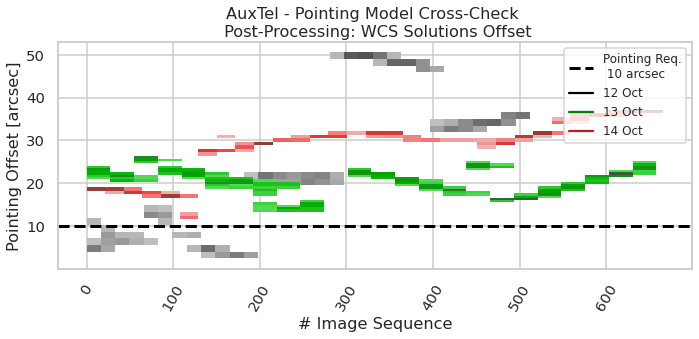

In [136]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(x=df.seq.loc[day1], y=df.PNT_OFFSET.loc[day1]*60, 
                  color="black", bins=31)
sns.histplot(x=df.seq.loc[day2], y=df.PNT_OFFSET.loc[day2]*60, ax=ax,
             color="green", bins=24)
sns.histplot(x=df.seq.loc[day3], y=df.PNT_OFFSET.loc[day3]*60, ax=ax,
             color="firebrick", bins=31)

ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')

for i in range(3):
    ax.plot([0.,0.],[10,10],color=colors[i],label=days[i])

ax.legend(fontsize=12)
ax.set_ylabel('Pointing Offset [arcsec]')
ax.set_xlabel('')
ax.set_title('AuxTel - Pointing Model Cross-Check \n Post-Processing: WCS Solutions Offset')
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Image Sequence')
fig.tight_layout()
fig.savefig(f'figures/pointing_offset_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

In [137]:
df.loc[(df.EL<60)&day1].head(20)

,DATE,MJD,EXPTIME,RA,DEC,AIRMASS,ROT_ANGLE,AZ,EL,RA_MD,...,CCDTEMP_MD,FILTER_MD,RA_WCS,DEC_WCS,dRA,dDEC,dAZ,dEL,PNT_OFFSET,seq
2022101101562,2022-10-12 08:30:58.878496,59864.354848,30.0,123.502521,7.341394,1.878280,310.365542,57.466688,32.075915,123.502292,...,-90.7014,SDSSr_65mm,123.493974,7.337119,0.512769,0.256451,0.187825,-0.546877,0.569569,454
92022101101559,2022-10-12 08:29:08.300510,59864.353568,30.0,123.407733,7.341376,1.892343,310.257208,57.754953,31.809620,123.407542,...,-90.6913,SDSSr_65mm,123.399294,7.337168,0.506337,0.252502,0.183327,-0.540068,0.562095,451
92022101101182,2022-10-12 04:15:44.745497,59864.177601,30.0,328.010305,17.413001,2.325706,50.104535,311.285392,25.362536,328.010125,...,-90.5766,SDSSr_65mm,328.007839,17.415556,0.147937,-0.153282,-0.001172,0.208386,0.208376,74
2022101101141,2022-10-12 03:49:07.707998,59864.159117,30.0,322.135207,-0.286800,1.615518,43.050940,296.835990,38.183902,322.135000,...,-90.5976,SDSSi_65mm,322.133252,-0.286326,0.117295,-0.028449,0.066903,0.108551,0.120694,33
92022101101579,2022-10-12 08:41:58.952497,59864.362488,30.0,123.786924,7.247393,1.787863,308.782970,55.541249,33.923040,123.786583,...,-90.6945,SDSSi_65mm,123.778265,7.242836,0.519525,0.273381,0.198644,-0.559625,0.583396,471
2022101101409,2022-10-12 06:48:37.161006,59864.283763,30.0,89.768269,-53.202002,1.230465,359.996386,140.915620,54.318749,89.768042,...,-90.5486,SDSSg_65mm,89.746082,-53.198012,1.331195,-0.239376,-0.200839,-0.824303,0.832571,301
2022101101427,2022-10-12 07:00:11.918996,59864.291805,30.0,90.392380,-52.825877,1.209724,359.996388,141.366710,55.712742,90.392208,...,-90.6951,SDSSr_65mm,90.370672,-52.821671,1.302487,-0.252347,-0.235197,-0.815854,0.826517,319
2022101101306,2022-10-12 05:38:56.523505,59864.235376,30.0,89.297030,-53.202001,1.423739,359.997761,136.543861,44.558722,89.296833,...,-90.6913,SDSSg_65mm,89.290859,-53.197519,0.370255,-0.268899,0.332505,-0.255998,0.348567,198
2022101101618,2022-10-12 09:06:52.063999,59864.379769,30.0,123.597219,7.435334,1.614286,304.582158,49.692461,38.205277,123.597000,...,-90.7052,SDSSg_65mm,123.588694,7.430229,0.511456,0.306286,0.226899,-0.565012,0.592470,510
2022101101449,2022-10-12 07:14:17.683994,59864.301594,30.0,90.390433,-52.637838,1.182872,359.996215,142.955340,57.676284,90.390208,...,-90.7146,SDSSr_65mm,90.368927,-52.633345,1.290342,-0.269634,-0.326532,-0.809656,0.828206,341


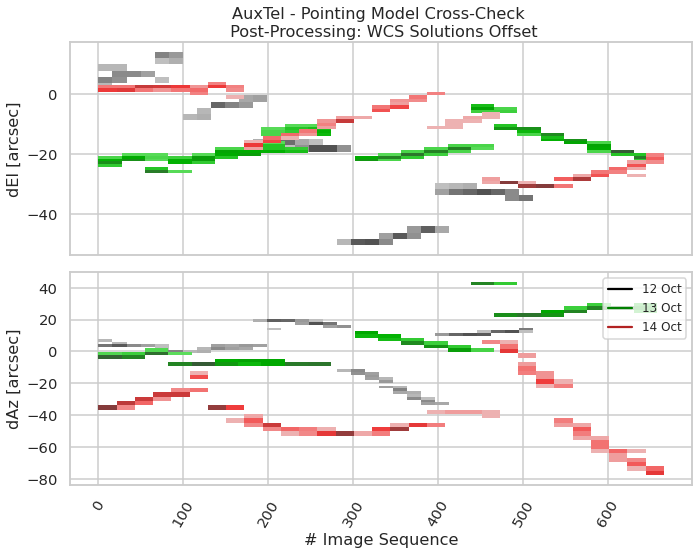

In [138]:
# fig.autofmt_xdate(rotation=45)
fig, axs = plt.subplots(2,1,figsize=(10,8),sharex='all')

ax = sns.histplot(x=df.seq.loc[day1], y=df.dEL.loc[day1]*60, ax=axs[0],
                  color="black", bins=31)
sns.histplot(x=df.seq.loc[day2], y=df.dEL.loc[day2]*60, ax=ax,
             color="green", bins=24)
sns.histplot(x=df.seq.loc[day3], y=df.dEL.loc[day3]*60, ax=ax,
             color="firebrick", bins=31)

ax.set_title('AuxTel - Pointing Model Cross-Check \n Post-Processing: WCS Solutions Offset')
ax.set_xlabel('')
ax.set_ylabel('dEl [arcsec]')

ax = sns.histplot(x=df.seq.loc[day1], y=df.dAZ.loc[day1]*60, ax=axs[1],
                  color="black", bins=31)
sns.histplot(x=df.seq.loc[day2], y=df.dAZ.loc[day2]*60, ax=ax,
             color="green", bins=24)
sns.histplot(x=df.seq.loc[day3], y=df.dAZ.loc[day3]*60, ax=ax,
             color="firebrick", bins=31)
for i in range(3):
    ax.plot([0.,0.],[10,10],color=colors[i],label=days[i])

ax.set_ylabel('dAz [arcsec]')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Image Sequence')
fig.tight_layout()
fig.savefig(f'figures/dEl_dAZ_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

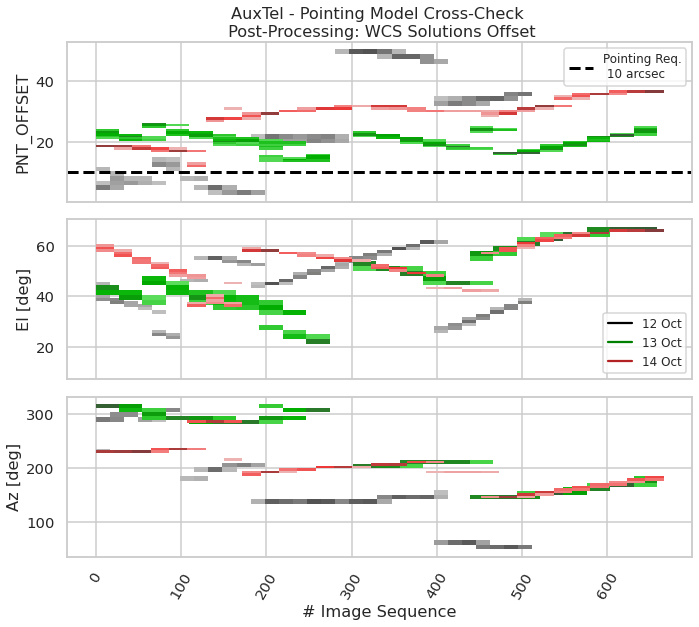

In [139]:
# fig.autofmt_xdate(rotation=45)
fig, axs = plt.subplots(3,1,figsize=(10,9),sharex='all')
fig.subplots_adjust()

ax = sns.histplot(x=df.seq.loc[day1], y=df.PNT_OFFSET.loc[day1]*60, ax=axs[0],
                  color="black", bins=31)
sns.histplot(x=df.seq.loc[day2], y=df.PNT_OFFSET.loc[day2]*60, ax=ax,
             color="green", bins=24)
sns.histplot(x=df.seq.loc[day3], y=df.PNT_OFFSET.loc[day3]*60, ax=ax,
             color="firebrick", bins=31)

ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.legend(fontsize=12)
ax.set_title('AuxTel - Pointing Model Cross-Check \n Post-Processing: WCS Solutions Offset')

ax = sns.histplot(x=df.seq.loc[day1], y=df.EL.loc[day1], ax=axs[1],
                  color="black", bins=31)
sns.histplot(x=df.seq.loc[day2], y=df.EL.loc[day2], ax=ax,
             color="green", bins=24)
sns.histplot(x=df.seq.loc[day3], y=df.EL.loc[day3], ax=ax,
             color="firebrick", bins=31)
for i in range(3):
    ax.plot([0.,0.],[10,10],color=colors[i],label=days[i])

ax.legend(fontsize=12,loc=4)
ax.set_xlabel('')
ax.set_ylabel('El [deg]')

ax = sns.histplot(x=df.seq.loc[day1], y=df.AZ.loc[day1], ax=axs[2],
                  color="black", bins=31)
sns.histplot(x=df.seq.loc[day2], y=df.AZ.loc[day2], ax=ax,
             color="green", bins=24)
sns.histplot(x=df.seq.loc[day3], y=df.AZ.loc[day3], ax=ax,
             color="firebrick", bins=31)
ax.set_ylabel('Az [deg]')

ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Image Sequence')
fig.tight_layout()
fig.savefig(f'figures/EL_AZ_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

In [140]:
df1 = df.loc[day3]

/tmp/ipykernel_1794/2635570202.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im0, ax=axs[0], pad=0.025, orientation='horizontal').set_label(r'PNT_Offset [arcsec]',fontsize=12)
/tmp/ipykernel_1794/2635570202.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im1, ax=axs[1], pad=0.025, orientation='horizontal').set_label(r'Az [deg]',fontsize=12)
/tmp/ipykernel_1794/2635570202.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im2, ax=axs[2], pad=0.025, orientation='horizontal').set_label(r'El [deg]',fontsize=12)


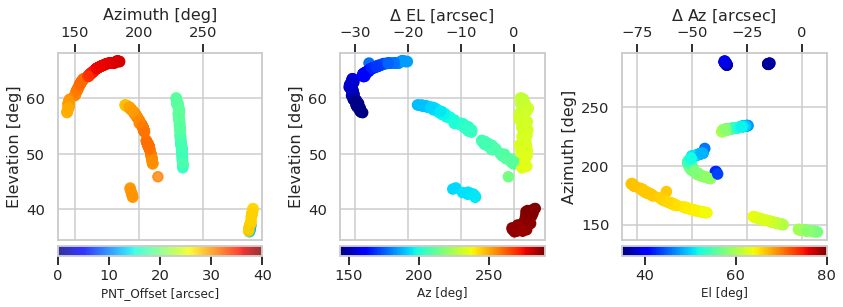

In [141]:
fig, axs = plt.subplots(1, 3, figsize=(16*0.5+4, 9*0.5))
plt.subplots_adjust(wspace=0.4)

im0 = axs[0].scatter(df1.AZ, df1.EL, s=100, alpha=0.8, c=df1.PNT_OFFSET*60, vmin=0, vmax=40, label=f'{len(df1)} Fields', cmap='jet')
axs[0].set_ylabel('Elevation [deg]',fontsize=16)
axs[0].set_title(r'Azimuth [deg]',fontsize=16)
axs[0].xaxis.set_ticks_position('top')

im1 = axs[1].scatter(df1.dEL*60,df1.EL,s=100, c=df1.AZ, cmap='jet')#, vmin=-40, vmax=40)
axs[1].set_ylabel('Elevation [deg]',fontsize=16)
axs[1].set_title(r'$\Delta$ EL [arcsec]',fontsize=16)
axs[1].xaxis.set_ticks_position('top')

im2 = axs[2].scatter(df1.dAZ*60,df1.AZ,s=100, c=df1.EL, cmap='jet',vmin=35, vmax=80)#, vmin=-30., vmax=0.)
axs[2].set_ylabel('Azimuth [deg]',fontsize=16)
axs[2].set_title(r'$\Delta$ Az [arcsec]',fontsize=16)
axs[2].xaxis.set_ticks_position('top')

plt.colorbar(im0, ax=axs[0], pad=0.025, orientation='horizontal').set_label(r'PNT_Offset [arcsec]',fontsize=12)
plt.colorbar(im1, ax=axs[1], pad=0.025, orientation='horizontal').set_label(r'Az [deg]',fontsize=12)
plt.colorbar(im2, ax=axs[2], pad=0.025, orientation='horizontal').set_label(r'El [deg]',fontsize=12)
# fig.suptitle('AuxTel - Pointing Model Cross-Check \n Post-Processing: WCS Solutions Offset')
plt.tight_layout()
fig.savefig(f'figures/AzEl_pannel_{month}.png',facecolor='w',transparent=False,dpi=100)

## Plots

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
sns.set_context('talk', font_scale=0.9)
sns.set_style('whitegrid')

In [106]:
# exposures_high_el = df.seq.iloc[np.where(df.EL>60)[0]].to_numpy()
# imin, imax = exposures_high_el[0], exposures_high_el[-1]
# print(imin, imax)

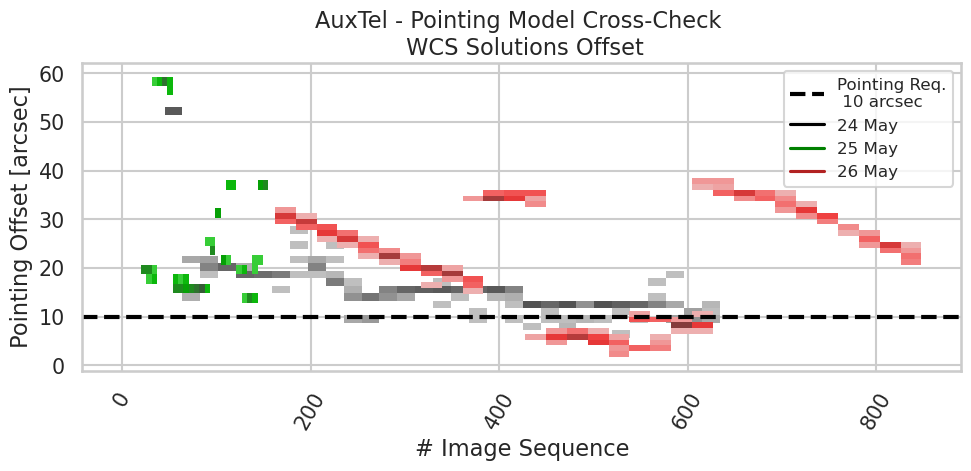

In [107]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(x=df.seq.loc[day1], y=df.PNT_OFFSET.loc[day1]*60, 
                  color="black", bins=31)
sns.histplot(x=df.seq.loc[day2], y=df.PNT_OFFSET.loc[day2]*60, ax=ax,
             color="green", bins=24)
sns.histplot(x=df.seq.loc[day3], y=df.PNT_OFFSET.loc[day3]*60, ax=ax,
             color="firebrick", bins=31)
ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')

for i in range(3):
    plt.plot([0.,0.],[10,10],color=colors[i],label=days[i])

ax.legend(fontsize=12)
ax.set_ylabel('Pointing Offset [arcsec]')
ax.set_xlabel('')
ax.set_title('AuxTel - Pointing Model Cross-Check \n WCS Solutions Offset')
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Image Sequence')
fig.tight_layout()
fig.savefig(f'figures/pointing_offset_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

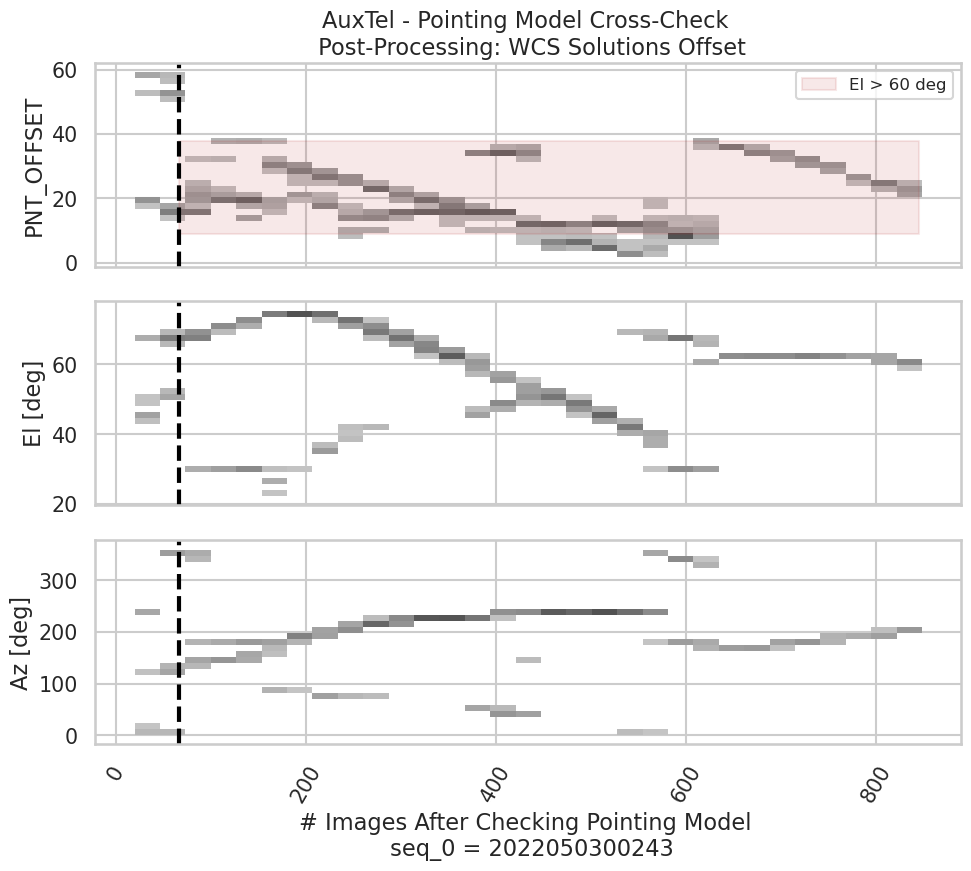

In [108]:
# fig.autofmt_xdate(rotation=45)
fig, axs = plt.subplots(3,1,figsize=(10,9),sharex='all')
fig.subplots_adjust()


ax = sns.histplot(x=df.seq, y=df.PNT_OFFSET*60, color="black", data=df, bins=31, ax=axs[0], label='A')
ax.fill_between([imin, imax], 9, 38, color='firebrick', alpha=0.1, label='El > 60 deg')
ax.axvline(imin, color='k',ls='--',lw=3)
ax.legend(fontsize=12)
ax.set_title('AuxTel - Pointing Model Cross-Check \n Post-Processing: WCS Solutions Offset')

ax = sns.histplot(x=df.seq, y=df.EL, color="black", data=df, bins=31, ax=axs[1])
# ax.fill_between([imin, imax], 5, -35, color='firebrick', alpha=0.1, label='El > 60 deg')
ax.axvline(imin, color='k',ls='--',lw=3)
ax.set_xlabel('')
ax.set_ylabel('El [deg]')

ax = sns.histplot(x=df.seq, y=df.AZ, color="black", data=df, bins=31, ax=axs[2])
# ax.fill_between([imin, imax], -40, 48, color='firebrick', alpha=0.1, label='El > 60 deg')
# ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.axvline(imin, color='k',ls='--',lw=3)
ax.set_ylabel('Az [deg]')

ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Images After Checking Pointing Model \n seq_0 = 2022050300243')
fig.tight_layout()
fig.savefig(f'figures/EL_AZ_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

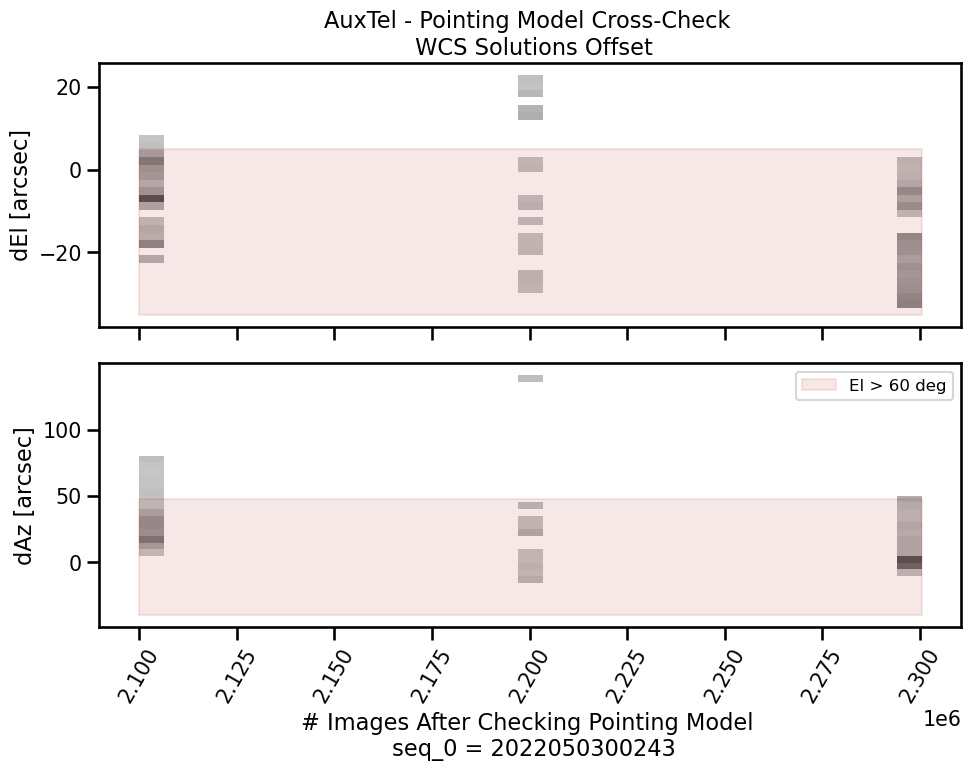

In [19]:
# fig.autofmt_xdate(rotation=45)
fig, axs = plt.subplots(2,1,figsize=(10,8),sharex='all')

ax = sns.histplot(x=df.seq, y=df.dEL*60, color="black", data=df, bins=31, ax=axs[0])
ax.fill_between([imin, imax], 5, -35, color='firebrick', alpha=0.1, label='El > 60 deg')
ax.set_title('AuxTel - Pointing Model Cross-Check \n WCS Solutions Offset')
ax.set_xlabel('')
ax.set_ylabel('dEl [arcsec]')

ax = sns.histplot(x=df.seq, y=df.dAZ*60, color="black", data=df, bins=31, ax=axs[1])
ax.fill_between([imin, imax], -40, 48, color='firebrick', alpha=0.1, label='El > 60 deg')
# ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.set_ylabel('dAz [arcsec]')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Images After Checking Pointing Model \n seq_0 = 2022050300243')
fig.tight_layout()
fig.savefig(f'figures/dEl_dAZ_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

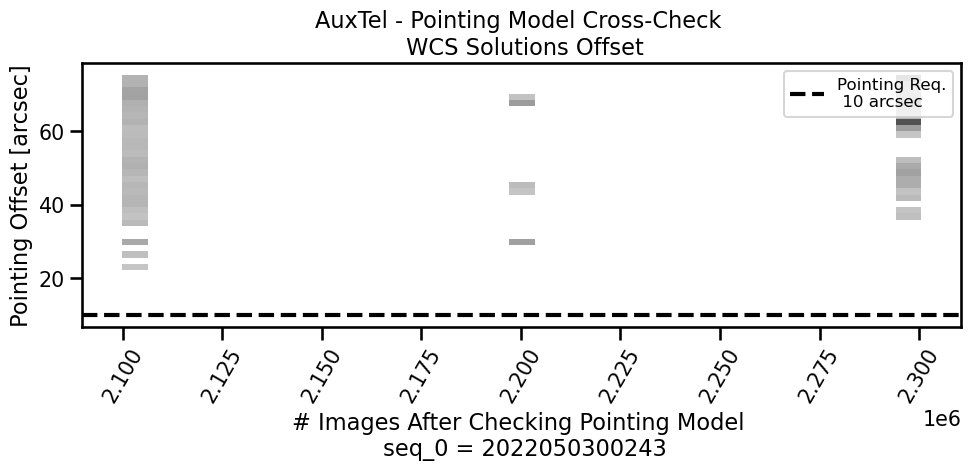

In [20]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(x=df.seq, y=df.EL, color="black", data=df, bins=31)
ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.set_ylabel('Pointing Offset [arcsec]')
ax.set_xlabel('')
ax.set_title('AuxTel - Pointing Model Cross-Check \n WCS Solutions Offset')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Images After Checking Pointing Model \n seq_0 = 2022050300243')
fig.tight_layout()
fig.savefig(f'figures/elevation_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

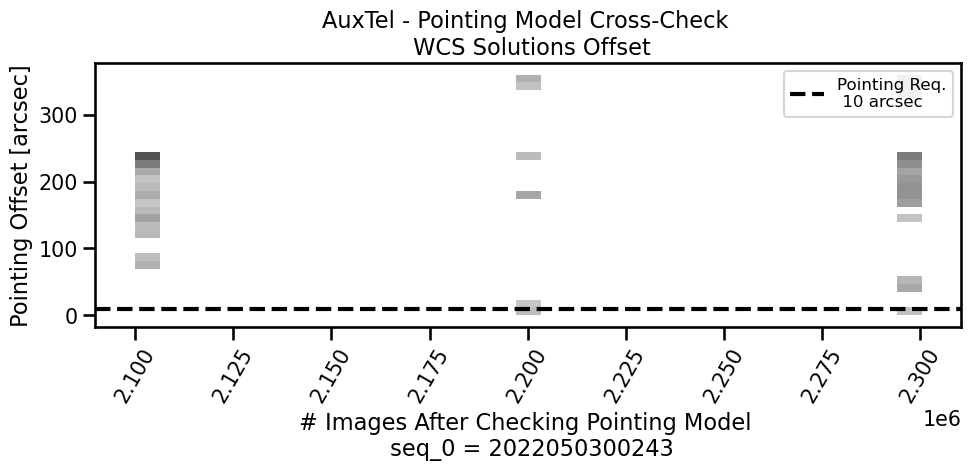

In [21]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(x=df.seq, y=df.AZ, color="black", data=df, bins=31)
ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.set_ylabel('Pointing Offset [arcsec]')
ax.set_xlabel('')
ax.set_title('AuxTel - Pointing Model Cross-Check \n WCS Solutions Offset')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Images After Checking Pointing Model \n seq_0 = 2022050300243')
fig.tight_layout()
fig.savefig(f'figures/az_offset_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

In [143]:
np.std(df.PNT_OFFSET.loc[day1])

0.26958557575484743

In [144]:
np.std(df.PNT_OFFSET.loc[day2])

0.04753614086472278

In [145]:
np.std(df.PNT_OFFSET.loc[day3])

0.11401266977103565

In [189]:
def compute_std(x):
    return 60*np.std(x)

In [190]:
masks = [day1, day2, day3]

stds = []
for mask in masks:
    std0 = compute_std(df.PNT_OFFSET.loc[mask].to_numpy())
    std1 = compute_std(df.dEL.loc[mask].to_numpy())
    std2 = compute_std(df.dAZ.loc[mask].to_numpy())
    stds.append([std0,std1,std2])

Text(0, 0.5, 'RMS [arcsec]')

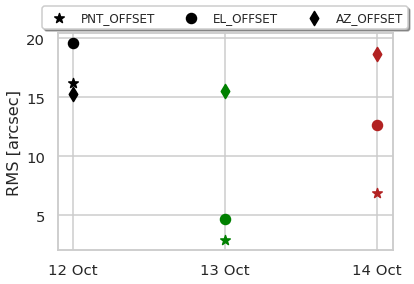

In [192]:
for i in range(3):
    plt.scatter(days[i], stds[i][0], marker='*', s=100, color=colors[i],label='PNT_OFFSET')
    plt.scatter(days[i], stds[i][1], marker='o', s=100, color=colors[i],label='EL_OFFSET')
    plt.scatter(days[i], stds[i][2], marker='d', s=100, color=colors[i],label='AZ_OFFSET')
    if i==0:
        plt.legend(fontsize=12,loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=True)    
plt.ylabel('RMS [arcsec]')